regression

In [ ]:
# from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
import numpy as np
import shap


In [ ]:
# Code snippet from SHAP github page

# train an XGBoost model

from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True,as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

model = xgb.XGBRegressor(objective = "reg:squarederror", n_estimators=1000, max_depth=10, learning_rate=0.01,
                                )

# Fit the model to the training data
model.fit(X_train, y_train)




pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
y_val_pred = model.predict(X_val)
predictions = [round(value) for value in y_val_pred]
accuracy = accuracy_score(y_val, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 98.15%


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


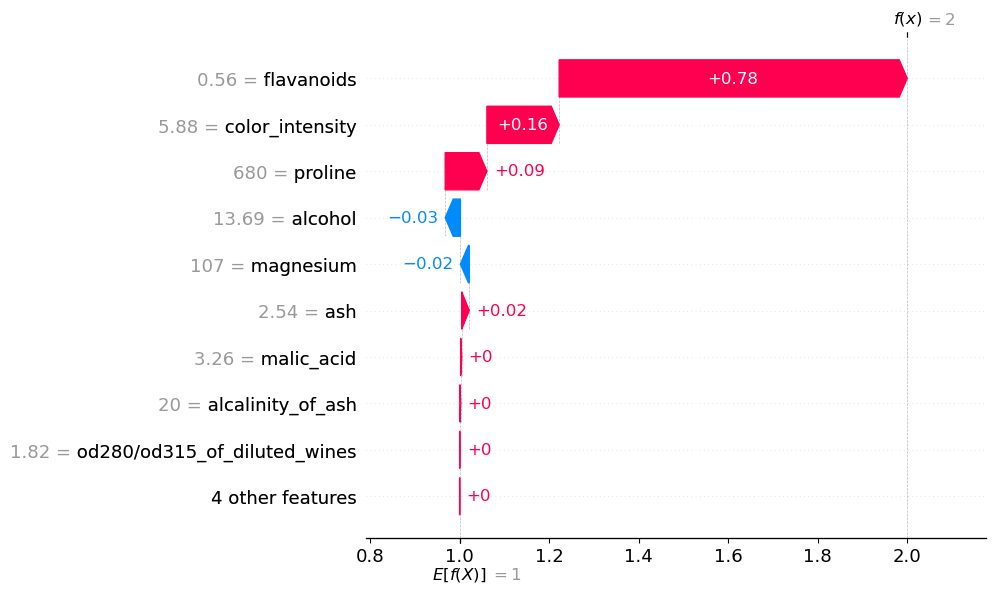

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_val)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

shap.plots.force(shap_values[0])

# XGBoost SHAP waterfall implementation,

To create an XGBoost SHAP waterfall implementation:

Train an XGBoost model on your data.

Use the "shap.Explainer" function to create a SHAP explainer object. This will allow you to compute SHAP values for your model predictions.

Use the "explainer.shap_values" method to compute the SHAP values for each prediction in your dataset.

Plot the SHAP values as a waterfall chart using a library such as Plotly or Matplotlib.

Interactively explore the waterfall chart to understand the contribution of each feature to the model's predictions.

shap_values.data == x sample



pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


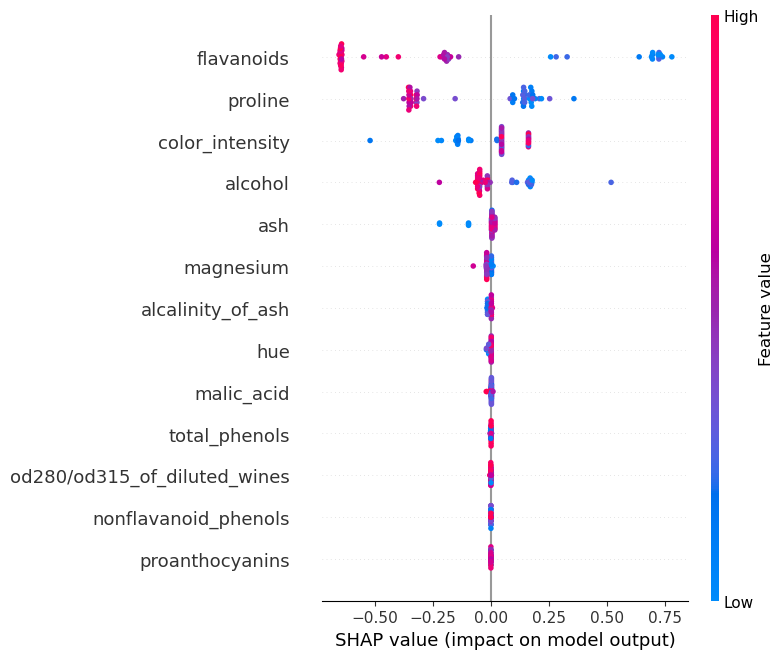

In [ ]:
tree_explainer = shap.TreeExplainer(model)
shap_values_tree = tree_explainer.shap_values(X_val)
shap.summary_plot(shap_values_tree, X_val)

classify

In [1]:
import os
import matplotlib.cm as cm
import sys
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

sys.path.append(parent_dir+'/functions/')
from xg_shap import *    

dir_data1 = 'Data'

dir_data = os.path.abspath(os.path.join(    parent_dir, os.pardir))+f'/{dir_data1}/'

%matplotlib inline



/home/yishai/anaconda3/envs/torch39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plotshap_(j,group_ind,dir_data):
    names_dict = pickle_load('k'+j+'_names_dict', dir_data)
    NamesAll = names_dict['NamesAll']
    CellIden = names_dict['CellIden']
    EpiCols = names_dict['EpiCols']
    Core = names_dict['Core']
    CellIden_EpiCols = CellIden + EpiCols
    groups = [['CellIden', 'EpiCols', 'CellIden+EpiCols'],
            [CellIden, EpiCols, CellIden_EpiCols]]

    names = [[f'samp{j}_CellIden_', f'samp{j} CellIden Based'],
            [f'samp{j}_EpiCols_', f'samp{j} EpiCols Based'],
            [f'samp{j}_CellIden+EpiCols_', f'samp{j} CellIden+EpiCols Based']]
    figname, title = names[group_ind]
    name, featureGroup = groups[0][group_ind], groups[1][group_ind]
    print(name, title, figname)
    labels = np.asarray(pickle_load(f'dbLabels_samp{j}_{name}_', dir_data))
    k = pd.concat([pickle_load('k'+j+'_dict', dir_data)['k']])[featureGroup]

    # df = pd.DataFrame({
    #                    'var1':random.sample(range(1, 100), 10),
    #                    'var2':random.sample(range(1, 100), 10),
    #                    'var3':random.sample(range(1, 100), 10),
    #                    'class': ['a','a','a','a','a','b','b','c','c','c']})
    # labels = df.pop('class')

    
    ind = labels !=-1 # drop unclustered rows (clust==-1)
    colors = cm.rainbow(np.linspace(0, 1, np.unique(labels).shape[0]-1))
    import random
    random.shuffle(colors)
    # %matplotlib inline
    # fig.show()
    
    xg_classification_shap(k.copy(),labels.copy(),ind,colors)


k4_names_dict ; loaded from file
CellIden+EpiCols samp4 CellIden+EpiCols Based samp4_CellIden+EpiCols_
dbLabels_samp4_CellIden+EpiCols_ ; loaded from file
k4_dict ; loaded from file


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


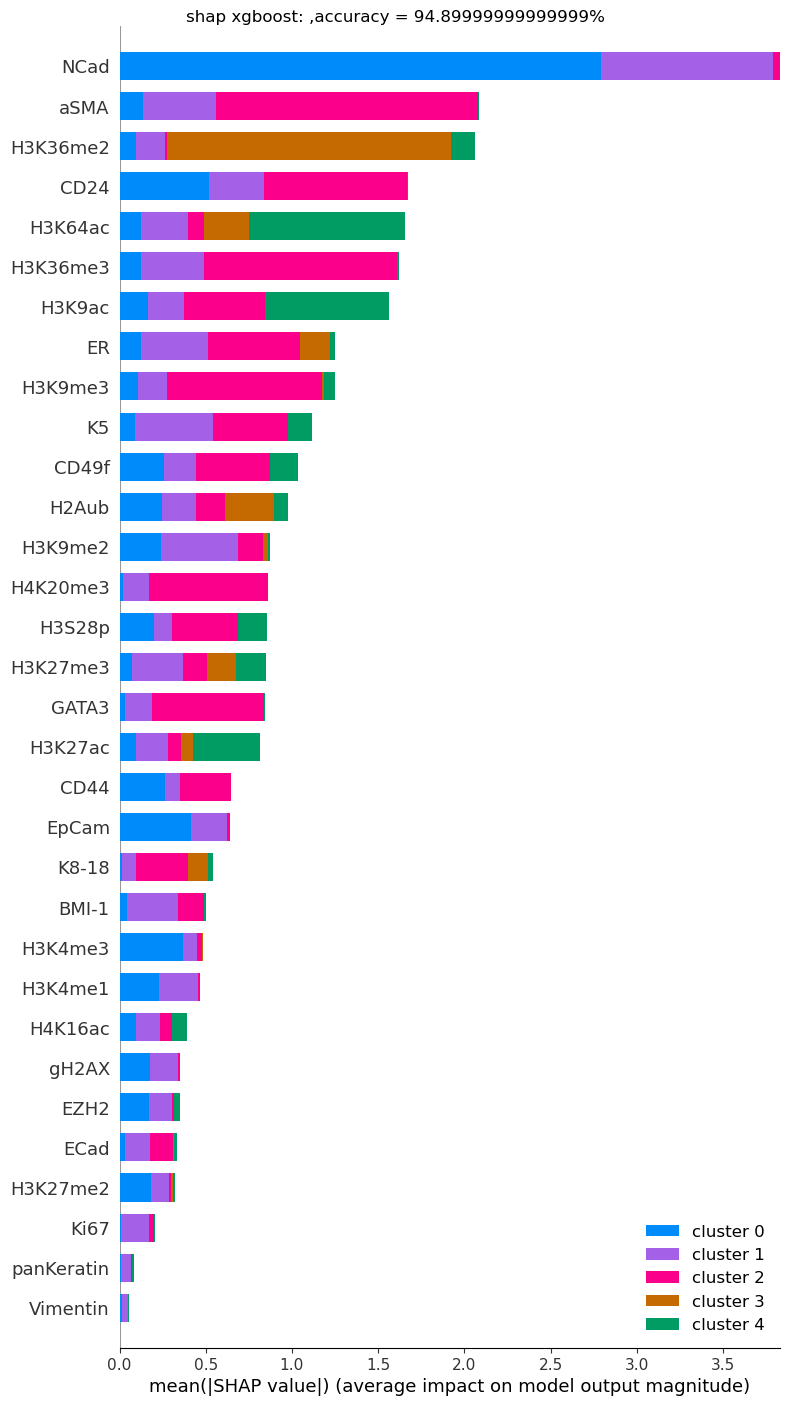

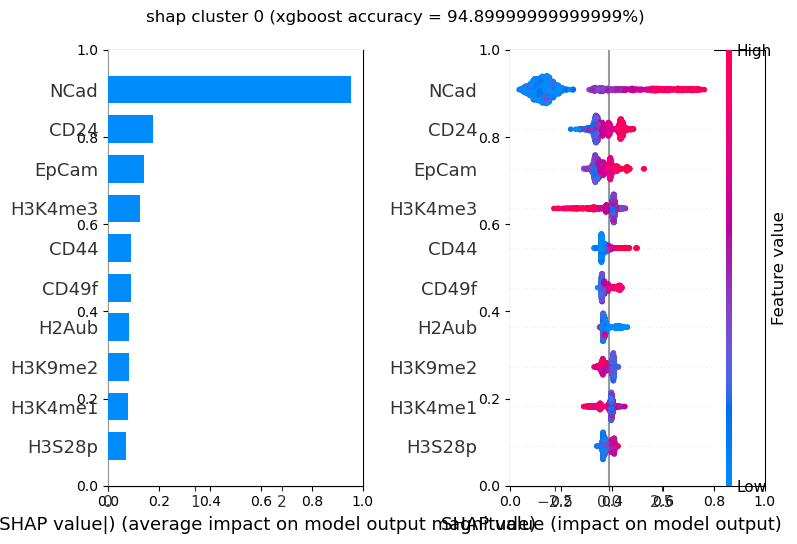

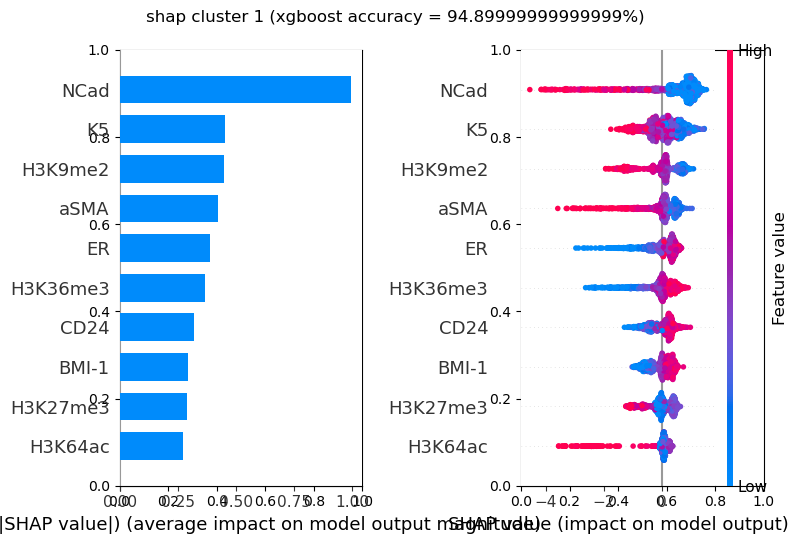

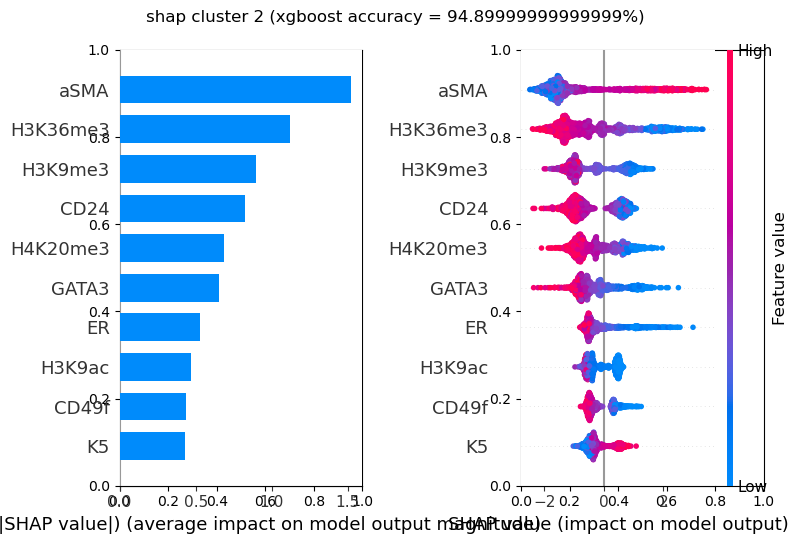

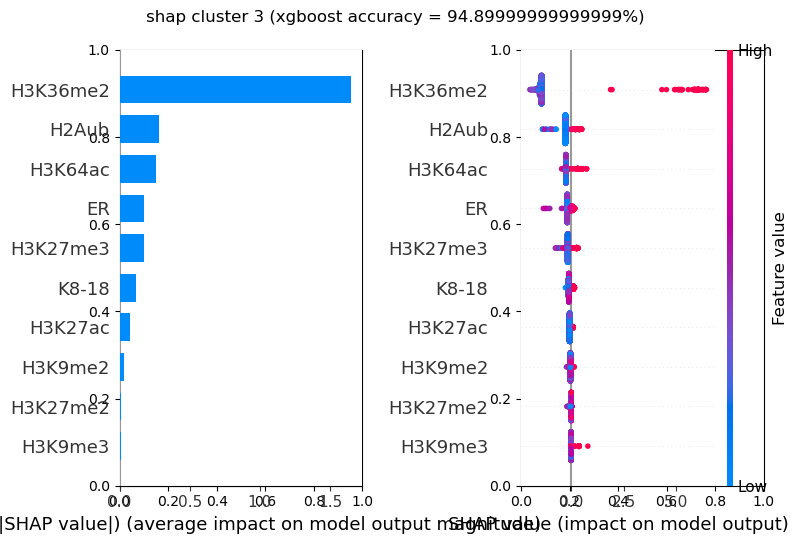

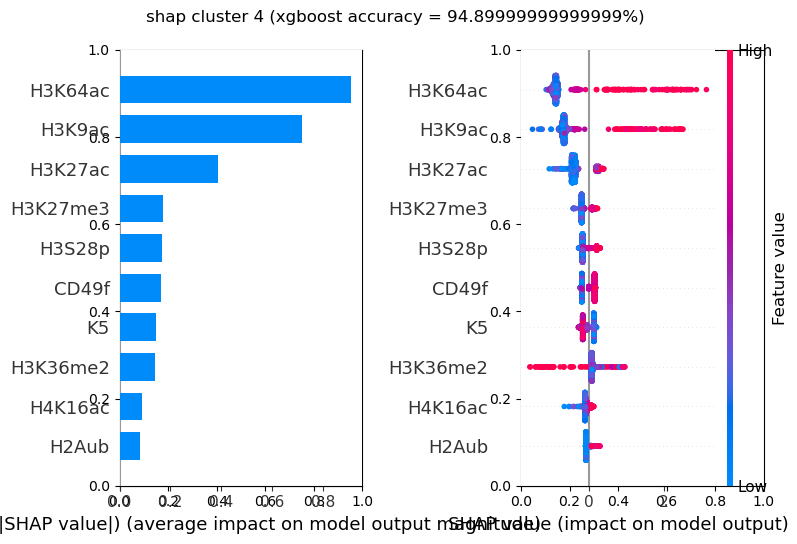

In [4]:

# j = 'b234'
# # j = 'b23ad'
# group_ind = 0
for j in ['4']:
    for group_ind in [2]:
        plotshap_(j,group_ind,dir_data)
        
